### This is the tutorial of deep learning on FashionMNIST dataset using Pytorch. We will build a Convolutional Neural Network for predicting the classes of Dataset. I am assuming you know the basics of deep leanrning like layer architecture... convolution concepts. Without further ado... Lets start the tutorial.

# **Importing Important Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

import os
from PIL import Image
from torchvision.io import read_image

from google.colab import drive
drive.mount('/content/drive')

data_root = '/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection'


Mounted at /content/drive


In [43]:
NUM_CLASSEES = 5
INPUT_SIZE = (224, 224)
PATCH_SIZE = (16, 16)
IN_CHANNELS = 3
RANDOM_SEED = 0
TRAIN_SPLIT_FRAC = 0.8
class Aptos(Dataset):
    def __init__(self, base_root: str, train: bool = True) -> None:
        super().__init__()
        self.mode = "train" if train else "val"
        imgs_file = "train_images"
        self.root = os.path.join(base_root, imgs_file)

        self.transform = transforms.Compose([
          transforms.Resize((224,224)),
          transforms.ToTensor(),
          transforms.RandomHorizontalFlip(p=1),
          transforms.RandomRotation(90),
          transforms.Normalize([0.4210, 0.2238, 0.0725], [0.2757, 0.1494, 0.0802]),
        ]
        )
        df =  pd.read_csv(data_root + "/train.csv")
        self.fnames = df["id_code"].to_numpy(dtype = str)
        self.img_labels = df["diagnosis"].to_numpy(dtype=str)
        # print('self.img_labels:',self.img_labels)

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
      # self.img_labels.iloc[idx, 0]
        label = self.img_labels[idx]
        img_path = os.path.join(data_root, "train_images", self.fnames[idx]  + '.png')
        image = Image.open(img_path).convert('RGB')
        # print(image)

        image = self.transform(image)

        return image, int(label)

        #image = read_image(img_path)

    def num_classes():
        return Aptos.NUM_CLASSES

# get aptos class from datasets nb and use same training data code
train_data = pd.read_csv(data_root + "/train.csv")
dataset = Aptos(
    base_root = "/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection",
    train=True
)
train_set, test_set = torch.utils.data.random_split(dataset, [int(len(dataset)*TRAIN_SPLIT_FRAC), len(dataset) - int(len(dataset)*TRAIN_SPLIT_FRAC)])
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

"""train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=100)"""


'train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=\n                                                transforms.Compose([transforms.ToTensor()]))\ntest_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=\n                                               transforms.Compose([transforms.ToTensor()]))\ntrain_loader = torch.utils.data.DataLoader(train_set,\n                                           batch_size=100)\ntest_loader = torch.utils.data.DataLoader(test_set,\n                                          batch_size=100)'

### We have 10 types of clothes in FashionMNIST dataset.


> Making a method that return the name of class for the label number.
ex. if the label is 5, we return Sandal.



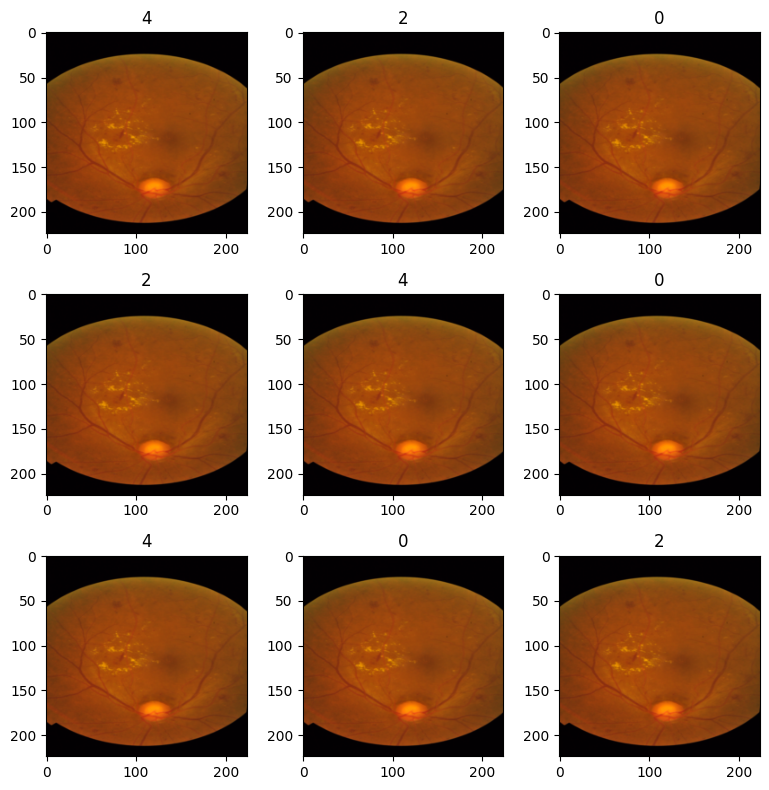

In [33]:
def output_label(label):
    output_mapping = {
        0: "No_DR",
        1: "Mild",
        2: "Moderate",
        3: "Severe",
        4: "PDR",
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data.iloc[sample_idx]
    print(label)
    figure.add_subplot(rows, cols, i)
    img_array = np.array(img)
    imgs, labels = next(iter(train_loader))
    # print(imgs[0], labels)
    plt.title(label)
    figure.tight_layout()
    # permute the dimensions so you have image shapes (224,224,3) instead of (3,224,224)
    # plt.imshow(imgs[0].permute(1,2,0))
    plt.imshow(imgs[0].permute(2,1,0))
plt.show()

### Playing with data and displaying some images using matplotlib imshow() method.





In [ ]:

a = next(iter(train_loader))
a[0].size()

torch.Size([10, 3, 224, 224])

In [ ]:
len(train_set)

2929

tensor([0, 0, 0, 0, 4, 2, 3, 2, 0, 2, 0, 0, 2, 2, 3, 2, 0, 0, 1, 0, 4, 0, 4, 0,
        0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 3, 2, 0, 0, 2, 0,
        2, 0, 4, 0, 2, 2, 0, 0, 2, 2, 3, 1, 1, 2, 2, 1])


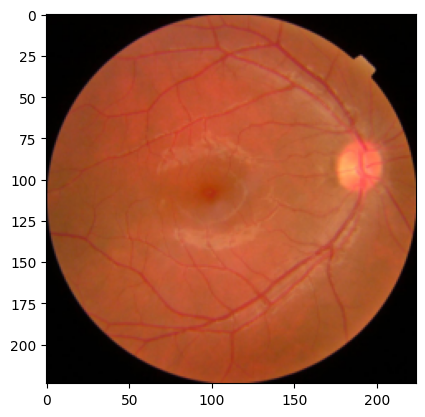

In [4]:
image, label = next(iter(train_loader))
plt.imshow(imgs[0].permute(1,2,0), cmap="gray")
print(label)

In [5]:
demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(len(images), len(labels))

KeyboardInterrupt: 

labels:  tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(2), 

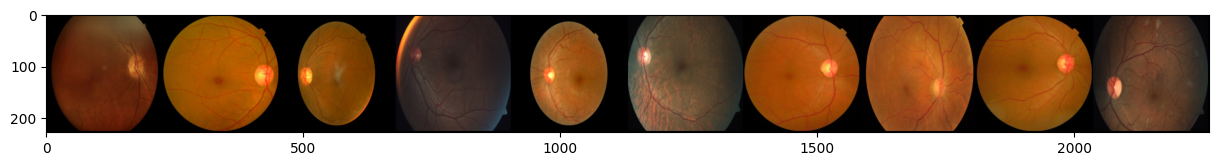

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(label, end=", ")


## Building a CNN


*   Make a model class (FashionCNN in our case)
    * It inherit nn.Module class that is a super class for all the neural networks in Pytorch.
* Our Neural Net has following layers:
    * Two Sequential layers each consists of following layers-
        * Convolution layer that has kernel size of 3 * 3, padding = 1 (zero_padding) in 1st layer and padding = 0 in second one. Stride of 1 in both layer.
        * Batch Normalization layer.
        * Acitvation function: ReLU.
        * Max Pooling layer with kernel size of 2 * 2 and stride 2.
     * Flatten out the output for dense layer(a.k.a. fully connected layer).
     * 3 Fully connected layer  with different in/out features.
     * 1 Dropout layer that has class probability p = 0.25.
  
     * All the functionaltiy is given in forward method that defines the forward pass of CNN.
     * Our input image is changing in a following way:
        * First Convulation layer : input: 28 \* 28 \* 3, output: 28 \* 28 \* 32
        * First Max Pooling layer : input: 28 \* 28 \* 32, output: 14 \* 14 \* 32
        * Second Conv layer : input : 14 \* 14 \* 32, output: 12 \* 12 \* 64
        * Second Max Pooling layer : 12 \* 12 \* 64, output:  6 \* 6 \* 64
    * Final fully connected layer has 10 output features for 10 types of clothes.

> Lets implementing the network...





In [44]:
class AptosCNN(nn.Module):

    def __init__(self):
        super(AptosCNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, padding=1),
            nn.BatchNorm2d(5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc1 = nn.Linear(in_features=30250, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out


### Making a model of our CNN class

*   Creating a object(model in the code)
*   Transfering it into GPU if available.
*  Defining a Loss function. we're using CrossEntropyLoss() here.
*  Using Adam algorithm for optimization purpose.



In [31]:
model = AptosCNN()

error = nn.CrossEntropyLoss()

learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

AptosCNN(
  (layer1): Sequential(
    (0): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=30250, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


## Training a network and Testing it on test dataset

In [45]:
num_epochs = 1
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
predictions_list = []
labels_list = []
train_tp, train_tn, train_fp, train_fn = [], [], [], []
valid_tp, valid_tn, valid_fp, valid_fn = [], [], [], []
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfer images and labels to GPU if available (if needed)

        # Convert images and labels to Variables (if using older PyTorch version)
        # images = Variable(images)
        # labels = Variable(labels)

        # Forward pass
        outputs = model(images)
        loss = error(outputs, labels)
        print(labels)

        # Zero gradients, backward pass, and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        count += 1

        # Print loss after every 50 iterations
        if count % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Iteration [{count}] Loss: {loss.item():.4f}')
    # Testing the model after each epoch
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    total = 0
    correct = 0

    with torch.no_grad():  # No need to calculate gradients during testing
        for images, labels in test_loader:
            # Transfer images and labels to GPU if available (if needed)

            # Forward pass
            outputs = model(images)
            loss = error(outputs, labels)
            test_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            predictions_list.append(predicted)
            labels_list.append(labels)
            loss_list.append(loss.item())
            iteration_list.append(total)
            accuracy_list.append((predicted == labels).sum().item())

    # Average test loss and accuracy
    avg_test_loss = test_loss / len(test_loader.dataset)
    accuracy = correct / total * 100

    print(f'Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    # Optionally, you can save these values for visualization
    """loss_list.append(avg_test_loss)
    accuracy_list.append(accuracy)
    iteration_list.append(count)"""

    model.train()  # Set model back to training mode

# Print final accuracy after all epochs (optional)
print(f'Final Accuracy: {accuracy:.2f}%')

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


tensor([0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2,
        0, 2, 2, 1, 4, 1, 4, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 3, 0, 1, 4, 0, 1, 2,
        1, 3, 4, 4, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2])
tensor([2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 0, 0, 3, 2, 0, 2, 0, 2, 2, 0, 0,
        2, 4, 2, 3, 2, 0, 2, 3, 0, 4, 4, 2, 0, 2, 0, 3, 2, 4, 0, 3, 3, 0, 0, 1,
        0, 0, 0, 2, 4, 0, 2, 2, 2, 0, 0, 0, 1, 0, 4, 0])
tensor([2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 4, 2, 0, 0, 0,
        4, 2, 2, 0, 2, 0, 0, 1, 4, 0, 1, 2, 0, 0, 4, 3, 0, 4, 2, 4, 0, 1, 2, 0,
        2, 3, 0, 2, 2, 0, 2, 0, 4, 4, 3, 2, 0, 0, 0, 2])
tensor([0, 0, 1, 1, 4, 2, 0, 0, 4, 0, 0, 0, 0, 0, 3, 2, 0, 4, 0, 2, 0, 4, 0, 1,
        0, 0, 3, 0, 0, 3, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3,
        0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 4, 0, 0, 0, 0])
tensor([0, 1, 4, 0, 0, 0, 0, 2, 2, 3, 2, 0, 0, 1, 0, 0, 4, 3, 0, 2, 0, 0, 2, 2,
        0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1,

In [46]:
print(iteration_list)
print(loss_list)
print(predictions_list)
print(labels_list)

[64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 733]
[0.6970780491828918, 0.7631585001945496, 0.9117576479911804, 0.5960301756858826, 0.9325965046882629, 0.9546139240264893, 0.9105864763259888, 0.9785478711128235, 0.8695141077041626, 0.8702582120895386, 0.8222299814224243, 0.864911675453186]
[tensor([2, 0, 1, 0, 2, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
        2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 3, 2, 0, 3, 2,
        0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2,
        2, 2, 0, 2, 3, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2,
        0, 2, 2, 0, 3, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0]), tensor([0, 2, 0, 0, 0, 3, 1, 0, 2, 3, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2]), tensor([0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0

### Visualizing the Loss and Accuracy with Iterations


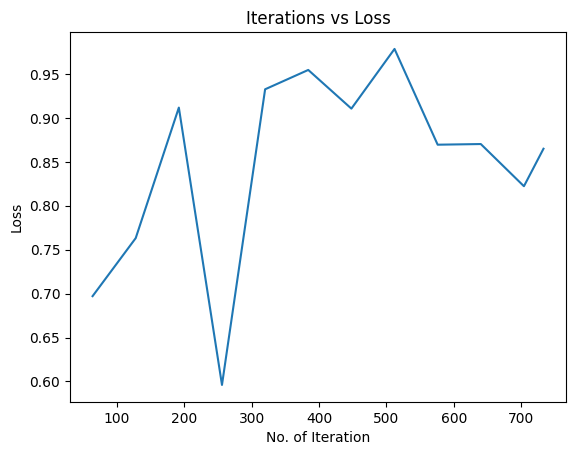

In [47]:
"""loss_sum = 0
for i in iteration_list:
  loss_sum += loss_list[i]
avg_loss = loss_sum/len(loss_list)
print(avg_loss)
"""
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

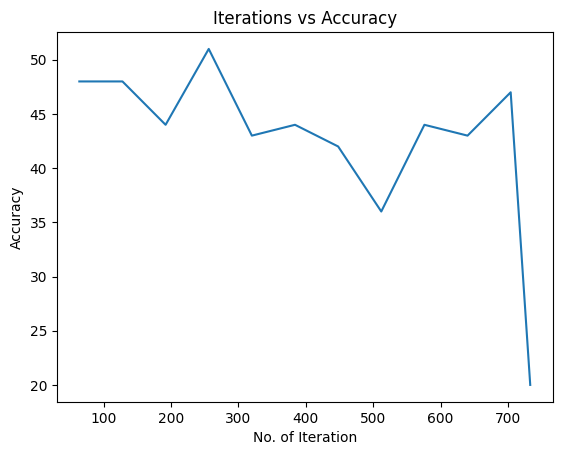

In [48]:
"""acc_sum = 0
for i in iteration_list:
  acc_sum += accuracy_list[i]
avg_acc = acc_sum/len(accuracy_list)
print(avg_acc)"""

plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

### Looking the Accuracy in each class of FashionMNIST dataset

In [49]:
class_correct = [0. for _ in range(1000)] #10
total_correct = [0. for _ in range(1000)] # 10

with torch.no_grad():
    for images, labels in test_loader:
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1

for i in range(5):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of No_DR: 95.22%
Accuracy of Mild: 13.75%
Accuracy of Moderate: 62.03%
Accuracy of Severe: 7.69%
Accuracy of PDR: 0.00%


### Printing the Confusion Matrix

In [50]:
import seaborn as sns


def make_confusion_matrix(train_tp, train_tn, train_fp, train_fn, labels=['No', 'Yes']):
    # Calculate metrics from TP, TN, FP, FN
    cm = np.array([[np.sum(train_tn), np.sum(train_fp)],
                   [np.sum(train_fn), np.sum(train_tp)]])

    # Create DataFrame for confusion matrix
    df_cm = pd.DataFrame(cm, index=[f'Actual - {labels[0]}', f'Actual - {labels[1]}'],
                         columns=[f'Predicted - {labels[0]}', f'Predicted - {labels[1]}'])

    # Create annotations for each cell
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plotting the heatmap with adjusted color scheme
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='', cmap='YlGnBu', cbar=False)  # Change 'cmap' to adjust the color scheme
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Train Confusion Matrix Across All Epochs')
    plt.show()

# Example usage:
make_confusion_matrix(train_tp, train_tn, train_fp, train_fn)


NameError: name 'train_tp' is not defined

In [42]:
from itertools import chain

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [45]:
predictions_l

[]

In [43]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

ValueError: max() arg is an empty sequence